## 8.1Principal Component Analysis ##
### 8.1.1 numpy ###

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
class PCA(object):
    """
    参数
    ------
    solver: 计算方法，包括计算协方差矩阵特征值特征向量(eig)以及奇异值分解(svd)
    components: 降维后的维度
    data: 数据
    feature: 特征数量
    num: 样本数量
    cov_mat: 协方差矩阵
    w: 降维矩阵
    eig_val: 特征值
    eig_vec: 特征向量
    
    返回值
    -------
    transformed: 降维后的数据
    """
    def __init__(self,components,data,solver = 'svd'):
        self.solver = solver                                    #方法
        self.components = components                            #降维后的维度
        self.data = data                                        #数据
        self.feature = self.data.shape[1]                       #数据特征数量
        self.num = self.data.shape[0]                           #样本数量
        self.mean = np.zeros([self.feature])                    #均值
        self.cov_mat = np.zeros([self.feature,self.feature])    #协方差矩阵
        self.w = np.zeros([self.feature,self.components])       #降维矩阵
        self.eig_val = np.zeros([self.feature])                 #特征值
        self.eig_vec = np.zeros([self.feature,self.feature])    #特征向量
        
    """
    计算均值并零均值化
    """    
    def _zero_center(self):

        self.mean = np.mean(self.data,axis=0)                   
        self.data -= self.mean
        
    """
    eig方法：计算协方差矩阵并计算其特征值特征向量
    """        
    def _cal_eigen(self):
        self.cov_mat = np.cov(self.data.T)                      
        self.eig_val,self.eig_vec = np.linalg.eig(self.cov_mat) 
    
    """
    svd方法：奇异值分解，sigma矩阵和右奇异矩阵对应eig方法中的特征值及特征向量
    """       
    def _svd(self):                                             

        self.eig_val,self.eig_vec = np.linalg.svd(mypca.data)[1:3]
        self.eig_vec = self.eig_vec.T
    
    """
    将特征向量特征值配对，按特征值从大到小排列，取出前components个特征向量构建矩阵w
    """          
    def _generate_matrix(self):
 
        eig_pairs = [(np.abs(self.eig_val[i]), self.eig_vec[:,i]) for i in range(len(self.eig_val))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)       #配对排序
        for i in range(self.components):
            self.w[:,i] = eig_pairs[i][1].reshape(self.feature,)          #构造矩阵
    
    def run(self):
        self._zero_center()
        if self.solver == 'eigen':
            self._cal_eigen()
        if self.solver == 'svd':
            self._svd()
        self._generate_matrix()
        transformed = self.data.dot(self.w)
        return transformed

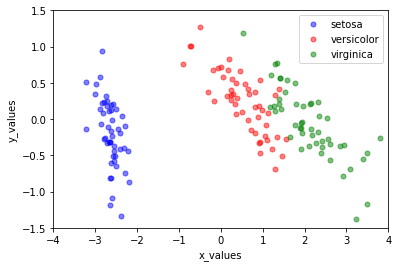

In [15]:
irisset = datasets.load_iris()
irisset = np.array(irisset.data)
mypca = PCA(2,irisset)
transformed = mypca.run()
plt.plot(transformed[0:50,0], transformed[0:50,1], 'o', markersize=5, color='blue', alpha=0.5, label='setosa')
plt.plot(transformed[50:100,0], transformed[50:100,1], 'o', markersize=5, color='red', alpha=0.5, label='versicolor')
plt.plot(transformed[100:150,0], transformed[100:150,1], 'o', markersize=5, color='green', alpha=0.5, label='virginica')
plt.xlim([-4,4])
plt.ylim([-1.5,1.5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

### 8.1.2 sklearn package ###

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,decomposition

In [17]:
irisset = datasets.load_iris()
irisset = np.array(irisset.data)
irisset = np.array(irisset)

In [18]:
pca = decomposition.PCA(n_components=2,svd_solver='randomized')

In [19]:
sktransformed = pca.fit_transform(irisset)

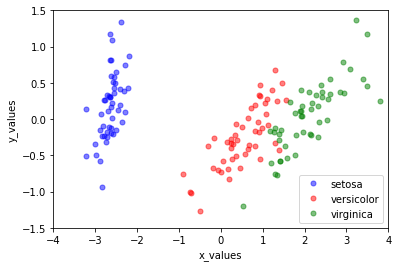

In [20]:
plt.plot(sktransformed[0:50,0], sktransformed[0:50,1], 'o', markersize=5, color='blue', alpha=0.5, label='setosa')
plt.plot(sktransformed[50:100,0], sktransformed[50:100,1], 'o', markersize=5, color='red', alpha=0.5, label='versicolor')
plt.plot(sktransformed[100:150,0], sktransformed[100:150,1], 'o', markersize=5, color='green', alpha=0.5, label='virginica')
plt.xlim([-4,4])
plt.ylim([-1.5,1.5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()